In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
import pickle

In [2]:
sns.set()

In [3]:
df = pd.read_csv("data/data.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.isnull().values.any()

False

In [7]:
output_labels = df['label'].unique()
output_labels

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## Here we can see that enteries for every crop type are equql we can conclude that the data is balanced so we do not need to address class imbalance

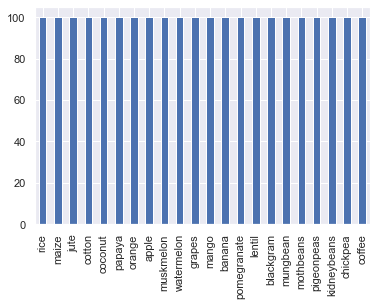

In [9]:
df["label"].value_counts().plot(kind="bar")
plt.show()

N
P
K
temperature
humidity
ph
rainfall


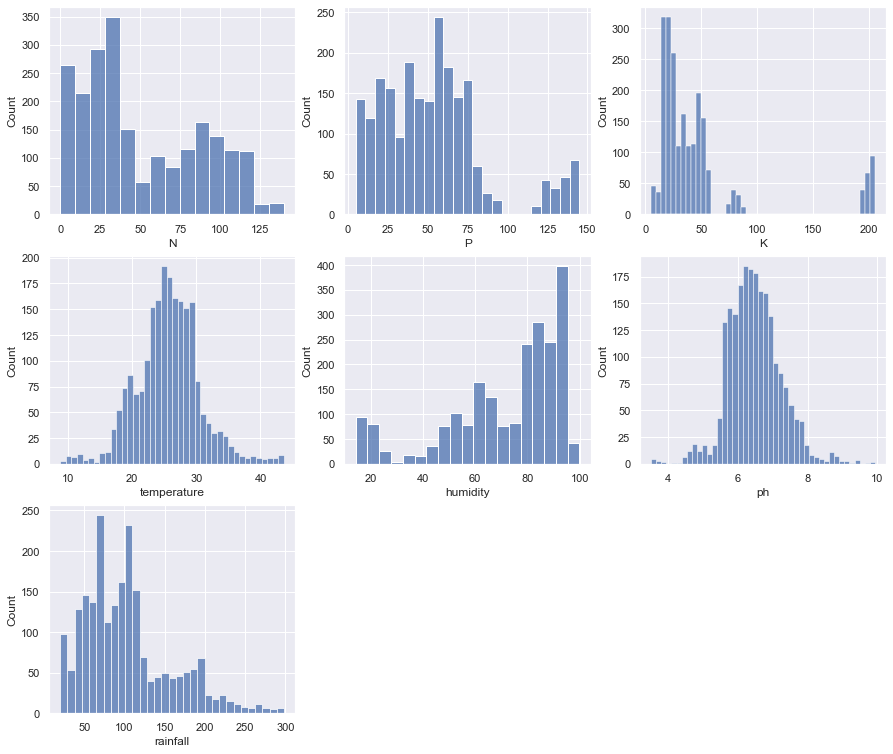

In [10]:
cols = df.columns[:-1]
plt.figure(figsize=(15,13))
i = 1
for col in cols:
    print(col)
    plt.subplot(3,3,i)
    sns.histplot(df[col])
    i+=1
plt.show()

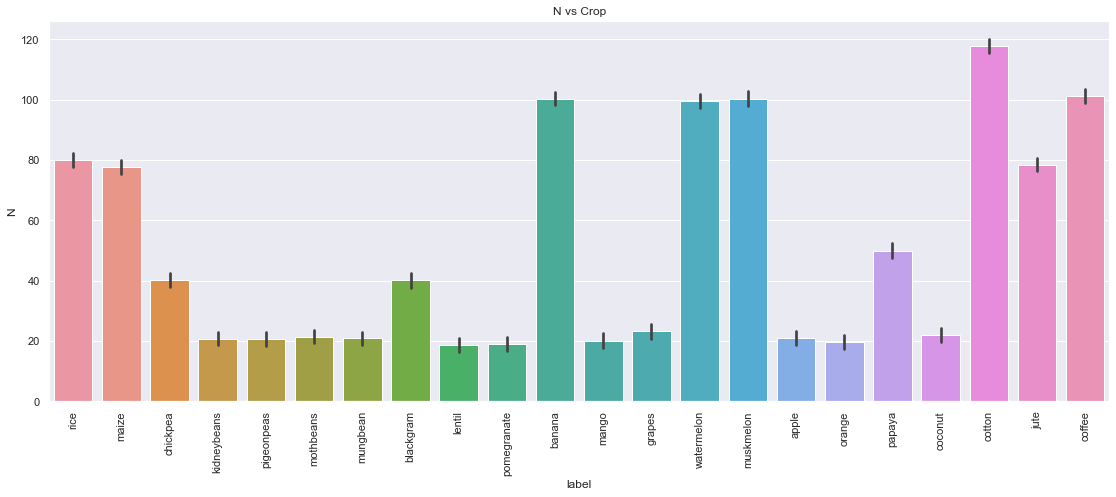

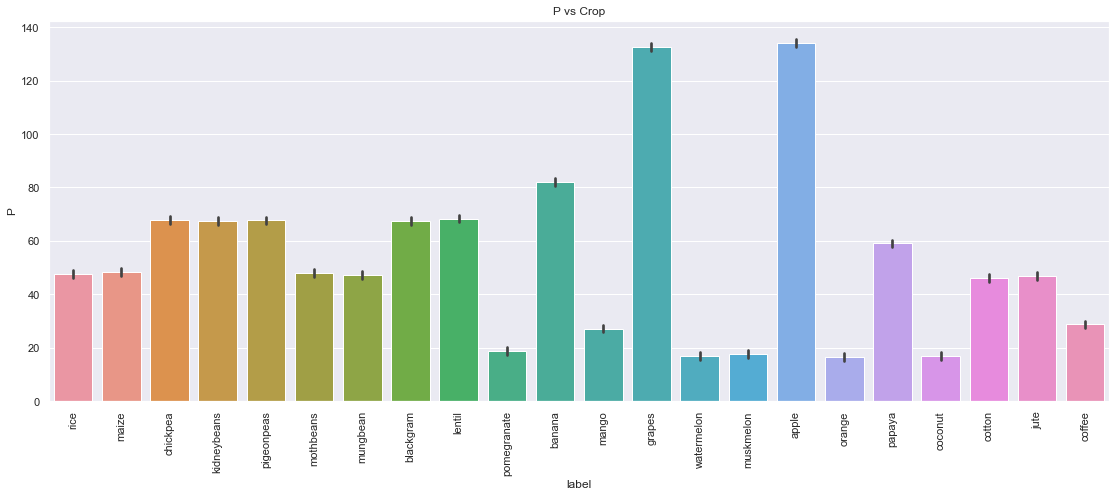

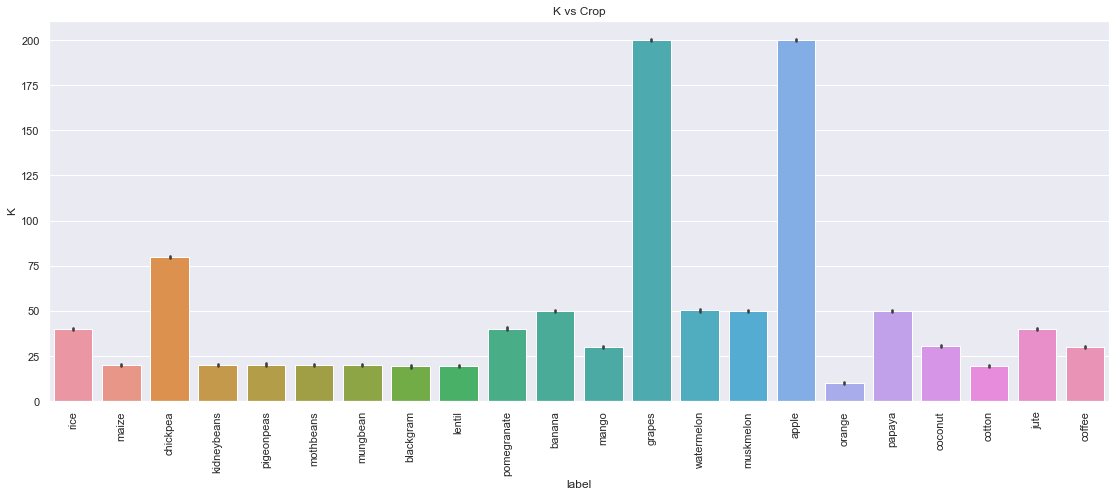

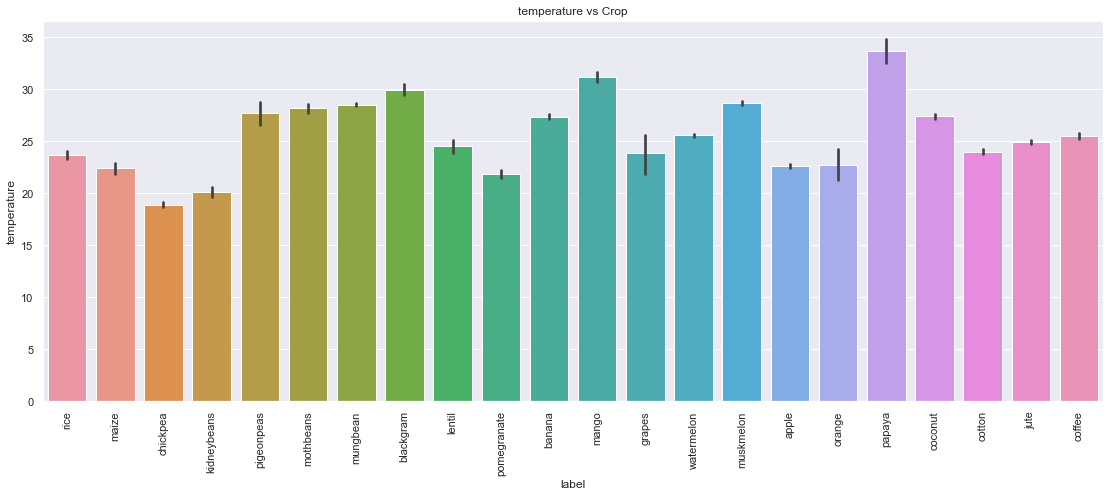

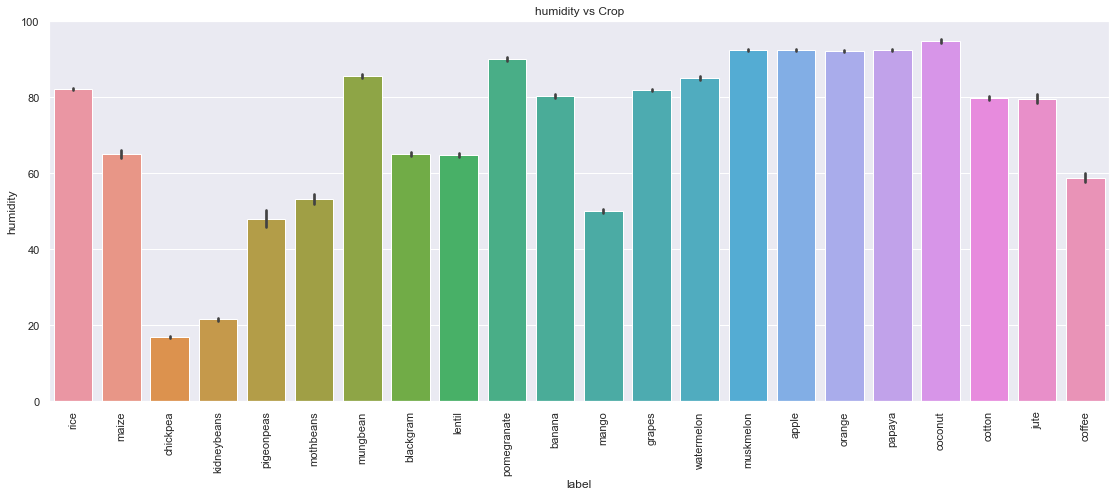

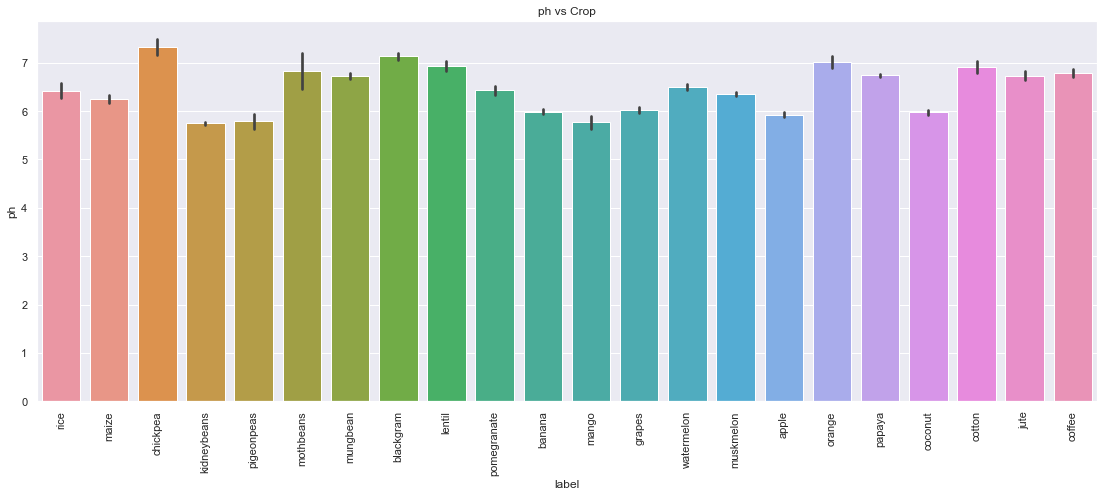

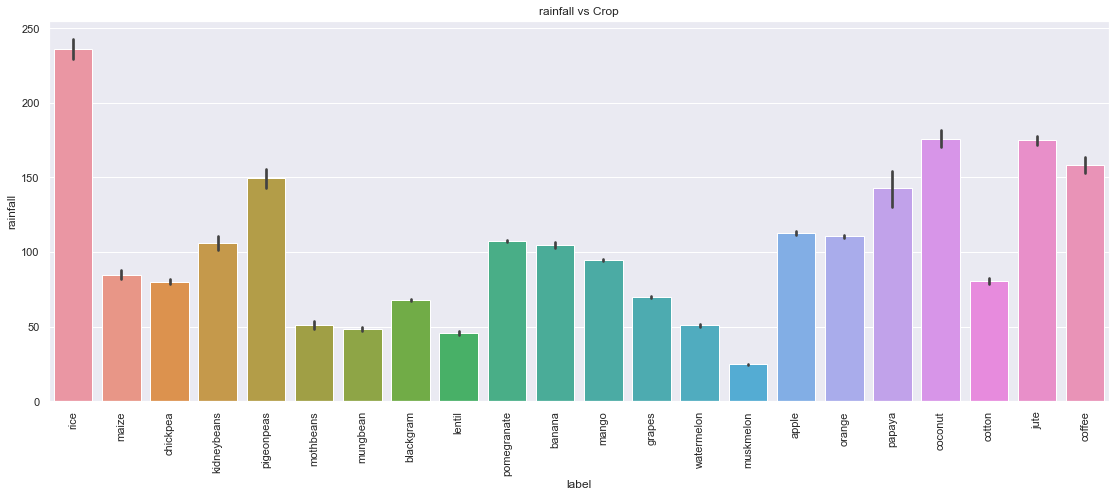

In [11]:
for col in cols:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "label", y = col, data = df)
    plt.xticks(rotation=90)
    plt.title(f"{col} vs Crop")
    plt.show()
    

<Figure size 1368x1224 with 0 Axes>

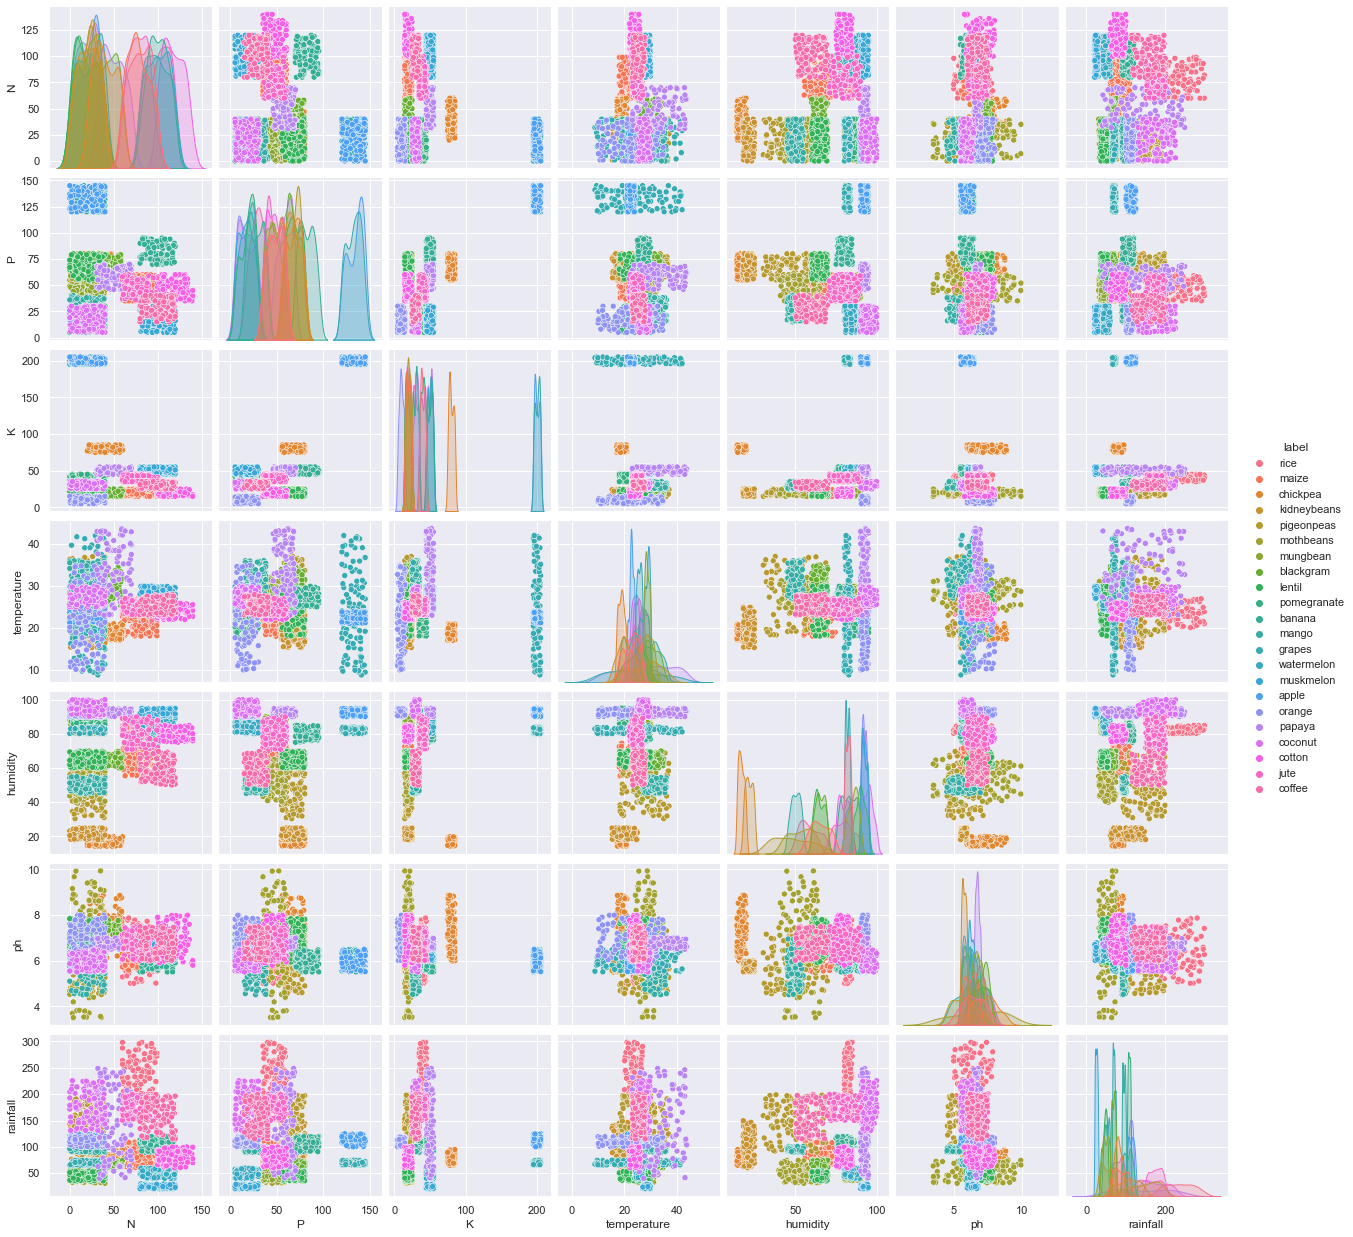

In [12]:
plt.figure(figsize=(19,17))
sns.pairplot(df, hue = "label")
plt.show()

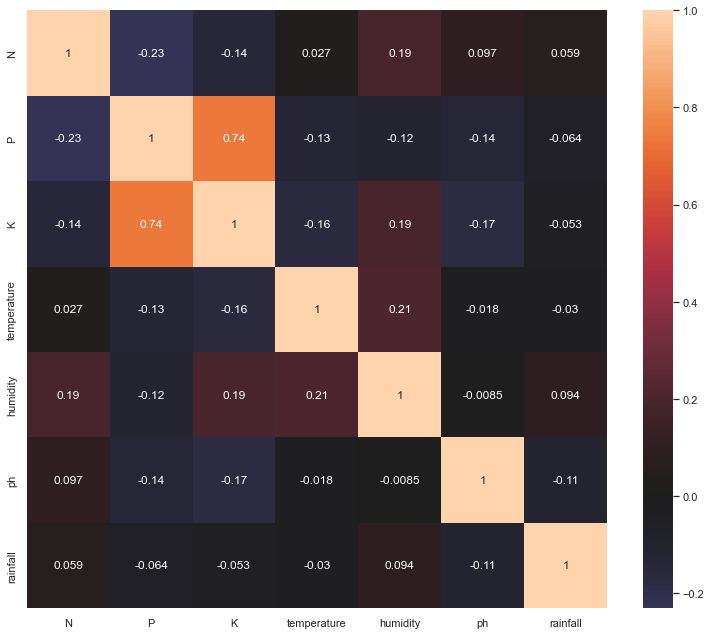

In [13]:
plt.figure(figsize = (13,11))
sns.heatmap(df.corr(), center = 0, annot = True)
plt.show()

In [14]:
label_encoder = LabelEncoder()
X = df[cols]
y = label_encoder.fit_transform(df["label"])
print(X.shape, y.shape)

(2200, 7) (2200,)


In [15]:
label_dict = {}
for i in range(22):
    label_dict[i] = label_encoder.inverse_transform([i])[0]
label_dict

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (1760, 7), (1760,)
Train Data: (440, 7), (440,)


# KNN-C

Accuracy at k = 1 is 0.975
Accuracy at k = 2 is 0.9681818181818181
Accuracy at k = 3 is 0.975
Accuracy at k = 4 is 0.9795454545454545
Accuracy at k = 5 is 0.9772727272727273
Accuracy at k = 6 is 0.9681818181818181
Accuracy at k = 7 is 0.9704545454545455
Accuracy at k = 8 is 0.9704545454545455
Accuracy at k = 9 is 0.9659090909090909
Accuracy at k = 10 is 0.9613636363636363
Accuracy at k = 11 is 0.9590909090909091
Accuracy at k = 12 is 0.9568181818181818
Accuracy at k = 13 is 0.9590909090909091
Accuracy at k = 14 is 0.9590909090909091
Accuracy at k = 15 is 0.9568181818181818
Accuracy at k = 16 is 0.9545454545454546
Accuracy at k = 17 is 0.9545454545454546
Accuracy at k = 18 is 0.95
Accuracy at k = 19 is 0.9522727272727273
Accuracy at k = 20 is 0.9477272727272728
Accuracy at k = 21 is 0.9431818181818182
Accuracy at k = 22 is 0.9409090909090909
Accuracy at k = 23 is 0.9363636363636364
Accuracy at k = 24 is 0.9409090909090909
Accuracy at k = 25 is 0.9318181818181818
Accuracy at k = 26 is 0.

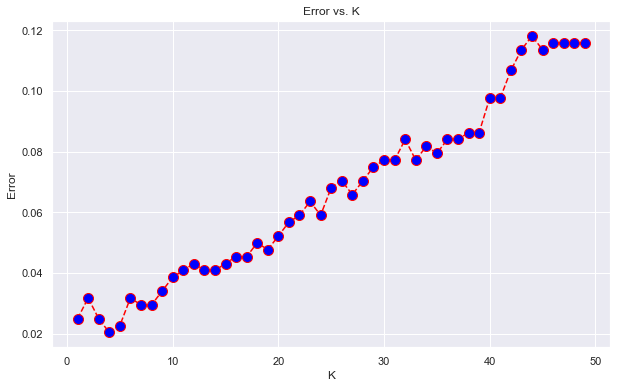

In [17]:
error = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error vs. K')
plt.xlabel('K')
plt.ylabel('Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

## So we know that best value for k is 4

Accuracy on Test Data: 97.95454545454545%


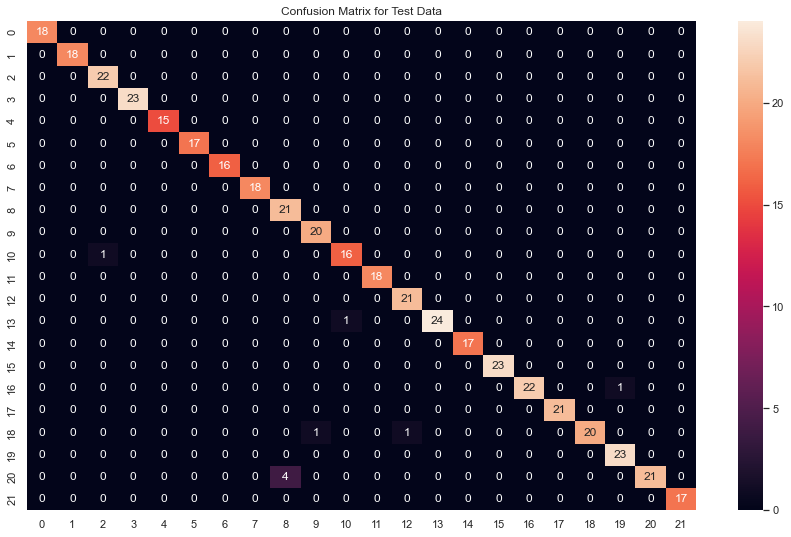

In [18]:
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 4))
knn_pipeline.fit(X_train, y_train)

# Test Data Metrics
predictions = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

Accuracy on Whole Data: 98.04545454545455%


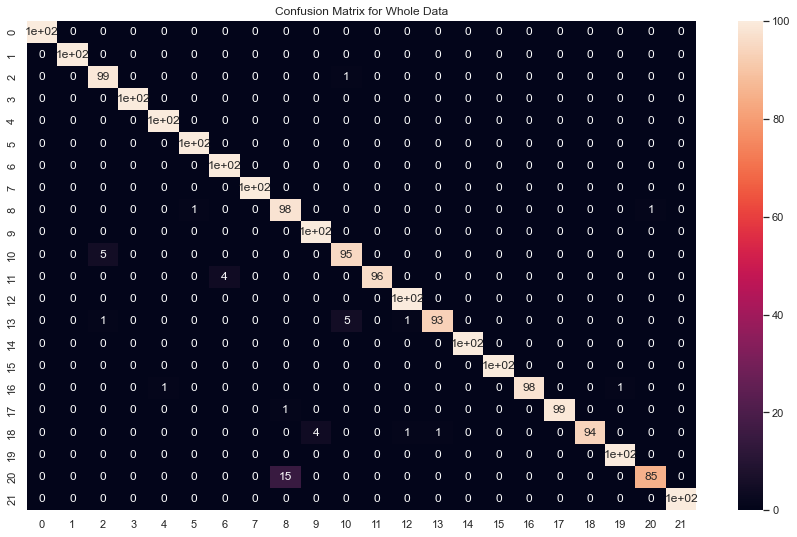

In [19]:
# Whole Data Metrics
predictions = knn_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

Accuracy on Test Data: 99.77272727272727%


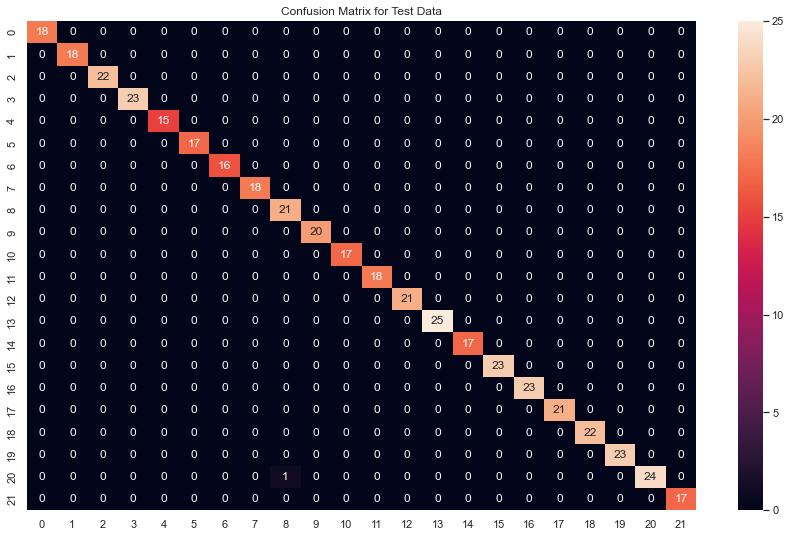


Accuracy on Whole Data: 99.95454545454545%


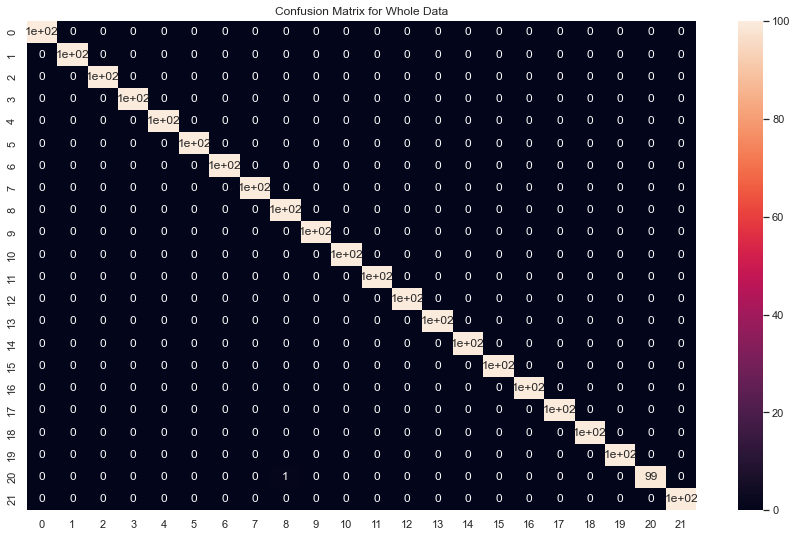

In [20]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

Accuracy on Test Data: 99.31818181818181%


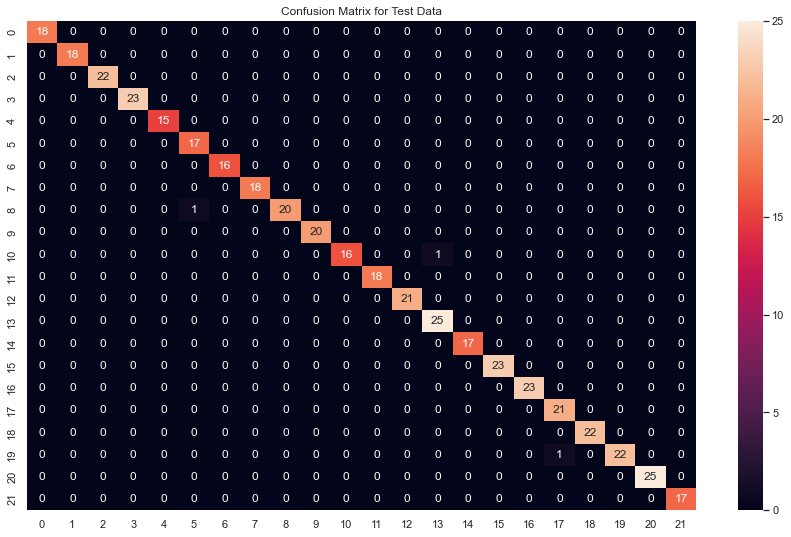


Accuracy on Whole Data: 99.86363636363636%


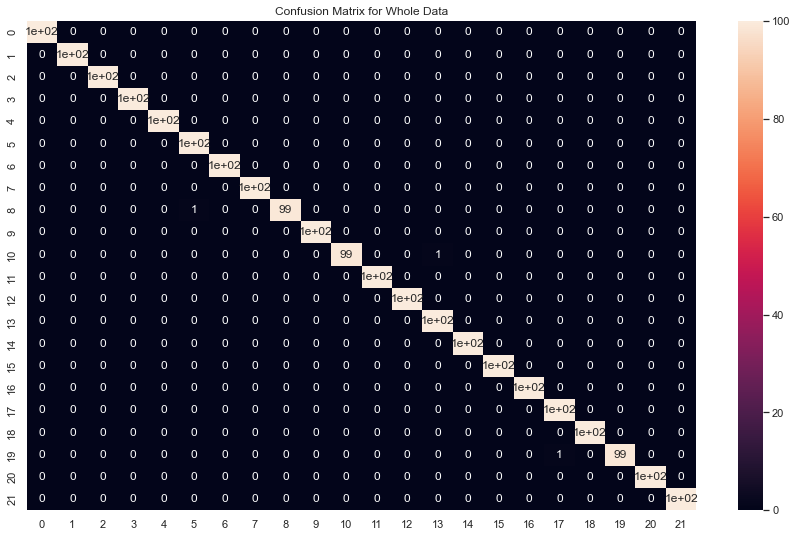

In [21]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [22]:
pickle.dump(knn_pipeline, open("knn_c.pkl", "wb"))
pickle.dump(rf_pipeline, open("rf_c.pkl", "wb"))
pickle.dump(xgb_pipeline, open("xgb_c.pkl", "wb"))
pickle.dump(label_dict, open("label_dict.pkl", "wb"))
print("Saved All Models")

Saved All Models


In [23]:
xgboost.__version__

'1.7.1'